# COMP 7150 Assignment 3
Due date: 03/25/2024, before midnight

**YOUR NAME**: Nitya Kanthi Nadimpalli

----

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
import pandas, seaborn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [123]:
df = pandas.read_csv('../Datasets/Mall_Customers.csv')

---
**Problem 1**

Create a KMeans model (use random state of 2024) based on Age, Annual Income, and Spending Score.  Rescale the features appropriately.

Visualize the number of clusters (k) versus inertia, and visually identify the below.


In [124]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [125]:
model = KMeans(n_clusters=5)
features = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
model.fit(features)

KMeans(n_clusters=5)

In [126]:
df.describe().loc[['min','max']]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
min,1.0,18.0,15.0,1.0
max,200.0,70.0,137.0,99.0


In [127]:
from sklearn.preprocessing import MinMaxScaler

normalized_features = MinMaxScaler().fit_transform(features)

In [128]:
features.head(2)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81


In [129]:
normalized_features[0:2]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653]])

In [130]:
normalized_features = pandas.DataFrame(
    MinMaxScaler().fit_transform(features),
    columns = features.columns
)
normalized_features.head(2)

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.0,0.387755
1,0.057692,0.0,0.816327


In [131]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

normalized_features = pandas.DataFrame(
    MinMaxScaler().fit_transform(features),
    columns = features.columns
)

standardized_features = pandas.DataFrame(
    StandardScaler().fit_transform(features),
    columns = features.columns
)
standardized_features.sample(3)

,Age,Annual Income (k$),Spending Score (1-100)
33,-1.496335,-1.051949,1.622741
117,0.728432,0.169472,0.341630
54,0.800199,-0.670255,-0.201872


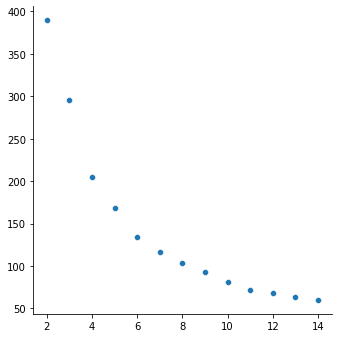

In [132]:
xs, ys = [], []
for k in range(2, 15):
    model = KMeans(n_clusters=k)
    model.fit(standardized_features)
    inertia = model.inertia_
    xs.append(k)
    ys.append(inertia)

seaborn.relplot(x=xs, y=ys, height=5, kind='scatter')

The elbow is around k=5, based on the visual analysis.

In [133]:
model = KMeans(n_clusters=5)
model.fit(standardized_features)
standardized_features['cluster'] = model.labels_

In [134]:
standardized_features.sample(5)

,Age,Annual Income (k$),Spending Score (1-100),cluster
128,1.446099,0.398489,-1.521805,4
74,1.446099,-0.250391,-0.124229,0
51,-0.419835,-0.708425,0.380451,2
182,0.513132,1.429063,-1.366519,4
99,-1.352802,0.016795,-0.046586,2


---
**Problem 2**

Build a model based on the value of k at the elbow.  Are older people more frugal than younger people?

Explain what you think being "frugal" means in this context.  And explain your answer.  It's not a simple "Yes" or "No".

### Answer:


In my opinion, the term 'frugal' means a person with a lower spending score is more conservative in their spending habits. For instance, an older person with a high 'Annual Income' but a low 'Spending Score' is considered more frugal than a younger person with a lower income but a higher spending score.


According to the analysis below, older people are more frugal than younger people.

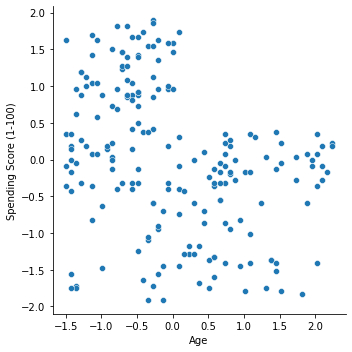

In [74]:
seaborn.relplot(data=standardized_features, x='Age', y='Spending Score (1-100)', height=5)

---

**Problem 3**

Do older people tend to live within their means and younger people don't?

Explain your answer.  It's not a simple "Yes" or "No".

### Answer:

On average, in each cluster, some people have high Spending Scores, and these tend to be younger people than older people. We can say that older people live within their means, and younger people don't.

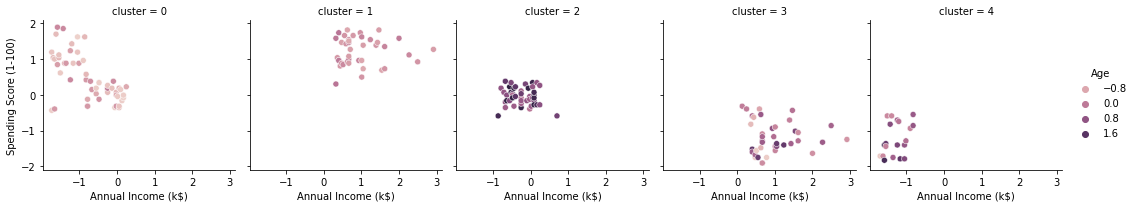

In [91]:
seaborn.relplot(data=standardized_features, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age', col='cluster', col_wrap=5, height=3)

---
**Problem 4**

What is the extend to which younger and older people live beyond their means? 

### Answer:

Younger people tend to have higher spending scores even at lower or similar income levels than older people. This suggests that younger individuals are more inclined to spend, which could be interpreted as living more liberally or beyond their means.

In [92]:
def categorize(age):
    value = age['Age']
    if value < 40:
        v = 'Younger'
    else:
        v = 'Older'
    return v

In [93]:
df.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
115,116,Female,Younger,65,50


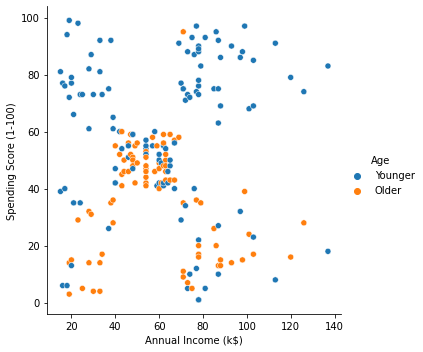

In [95]:
seaborn.relplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age', height=5)

In [97]:
average = df.groupby(['Age'])[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
average

,Annual Income (k$),Spending Score (1-100)
Age,,
Older,58.821429,36.797619
Younger,61.818966,59.905172


---
**Problem 5**

Is there any characteristic that is unique to male or female?

### Answer:

Based on the PCA plot, no characteristic is distinctly unique to males or females within the dimensions analyzed.

In [138]:
import pandas, seaborn
from sklearn.decomposition import PCA

In [139]:
pca=PCA()
df_features=df.drop(columns=['Gender'])
df_pca=pandas.DataFrame(pca.fit_transform(df_features))
df_pca.var()

0    4014.546653
1     694.555743
2     167.291502
3      25.429118
dtype: float64

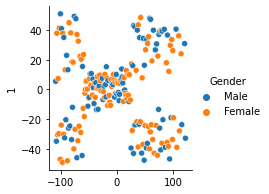

In [144]:
seaborn.relplot(data=df_pca, x=0, y=1, hue=df['Gender'], height=3)